In [1]:
import re
import pandas as pd
import seaborn as sns

## **0.** Limpieza y armado del dataset

In [2]:
whr = pd.read_excel("../datasets/WHR25_Data_Figure_2.1v3.xlsx")
qog_ts = pd.read_csv('../datasets/qog_bas_ts_jan25.csv')

In [3]:
qog = qog_ts.query("year >= 2011")[
    [
        "cname",
        "year",
        "ti_cpi",
        "vdem_polyarchy",
        "wdi_gini",
        "undp_hdi",
        "wdi_unempilo",
        "wdi_lifexp",
        "wdi_popurb"
    ]
].copy()

In [4]:
country_mapping = {
    "Bolivia": 'Bolivia (Plurinational State of)',
    "Central African Republic": 'Central African Republic (the)',
    "Comoros": 'Comoros (the)',
    "Congo": 'Congo (the)',
    "Côte d’Ivoire": "Côte d'Ivoire",
    "Dominican Republic": 'Dominican Republic (the)',
    "DR Congo": 'Congo (the Democratic Republic of the)',
    "Gambia": 'Gambia (the)',
    "Iran": 'Iran (Islamic Republic of)',
    "Lao PDR": "Lao People's Democratic Republic (the)",
    "Netherlands": 'Netherlands (the)',
    "Niger": 'Niger (the)',
    "Philippines": 'Philippines (the)',
    "Republic of Korea": 'Korea (the Republic of)',
    "Republic of Moldova": 'Moldova (the Republic of)',
    "Russian Federation": 'Russian Federation (the)',
    "Sudan": 'Sudan (the)',
    "Syria": 'Syrian Arab Republic (the)',
    "Tanzania": 'Tanzania, the United Republic of',
    "Türkiye": 'Turkey',
    "United Arab Emirates": 'United Arab Emirates (the)',
    "United Kingdom": 'United Kingdom of Great Britain and Northern Ireland (the)',
    "United States": 'United States of America (the)',
    "Venezuela": 'Venezuela (Bolivarian Republic of)',
    'Swaziland': 'Eswatini'
}
whr['Country name'] = whr['Country name'].replace(country_mapping)
whr_countries = whr['Country name'].unique()
qog_countries = qog.cname.unique()

countries_to_drop = [c for c in whr_countries if c not in qog_countries]
whr_clean = whr[~whr['Country name'].isin(countries_to_drop)].copy()

In [5]:
df = whr_clean.merge(
    qog,
    left_on=['Country name', 'Year'],
    right_on=['cname', 'year'],
    how='left'
).drop(['cname', 'year'], axis=1)

df = df.rename(columns={
    'ti_cpi': 'corruption_index',
    'vdem_polyarchy': 'democracy_index',
    'wdi_gini': 'gini_coefficient',
    'wdi_internet': 'internet_pct',
    'undp_hdi': 'human_dev_index'
})

In [6]:
prefijo_patron = r"^Explained by:\s*"
sufijo_patron = r"\s*\(3-year average\)$"

col_names = []
for c in df.columns:
    _name = re.sub(prefijo_patron, "", c)
    _name = re.sub(sufijo_patron, "", _name)
    _name = _name.replace(" ", "_").replace("+", "").replace("__", "_")
    col_names.append(_name.lower())

df.columns = col_names
df_clean = df.query("year >= 2014 and year <= 2023").copy()

In [7]:
df_whr = df[[
    'year',
    'country_name',
    'log_gdp_per_capita',
    'social_support',
    'healthy_life_expectancy',
    'freedom_to_make_life_choices',
    'generosity',
    'perceptions_of_corruption',
    'life_evaluation'
]].dropna().reset_index(drop=True)

df_whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          838 non-null    int64  
 1   country_name                  838 non-null    object 
 2   log_gdp_per_capita            838 non-null    float64
 3   social_support                838 non-null    float64
 4   healthy_life_expectancy       838 non-null    float64
 5   freedom_to_make_life_choices  838 non-null    float64
 6   generosity                    838 non-null    float64
 7   perceptions_of_corruption     838 non-null    float64
 8   life_evaluation               838 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 59.1+ KB


In [8]:
df_whr.head()

,year,country_name,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,life_evaluation
0,2024,Afghanistan,0.649,0.0,0.155,0.0,0.075,0.135,1.364
1,2023,Afghanistan,0.628,0.0,0.242,0.0,0.091,0.088,1.721
2,2022,Afghanistan,0.645,0.0,0.087,0.0,0.093,0.059,1.859
3,2021,Afghanistan,0.758,0.0,0.289,0.0,0.089,0.005,2.404
4,2020,Afghanistan,0.370,0.0,0.126,0.0,0.122,0.010,2.523


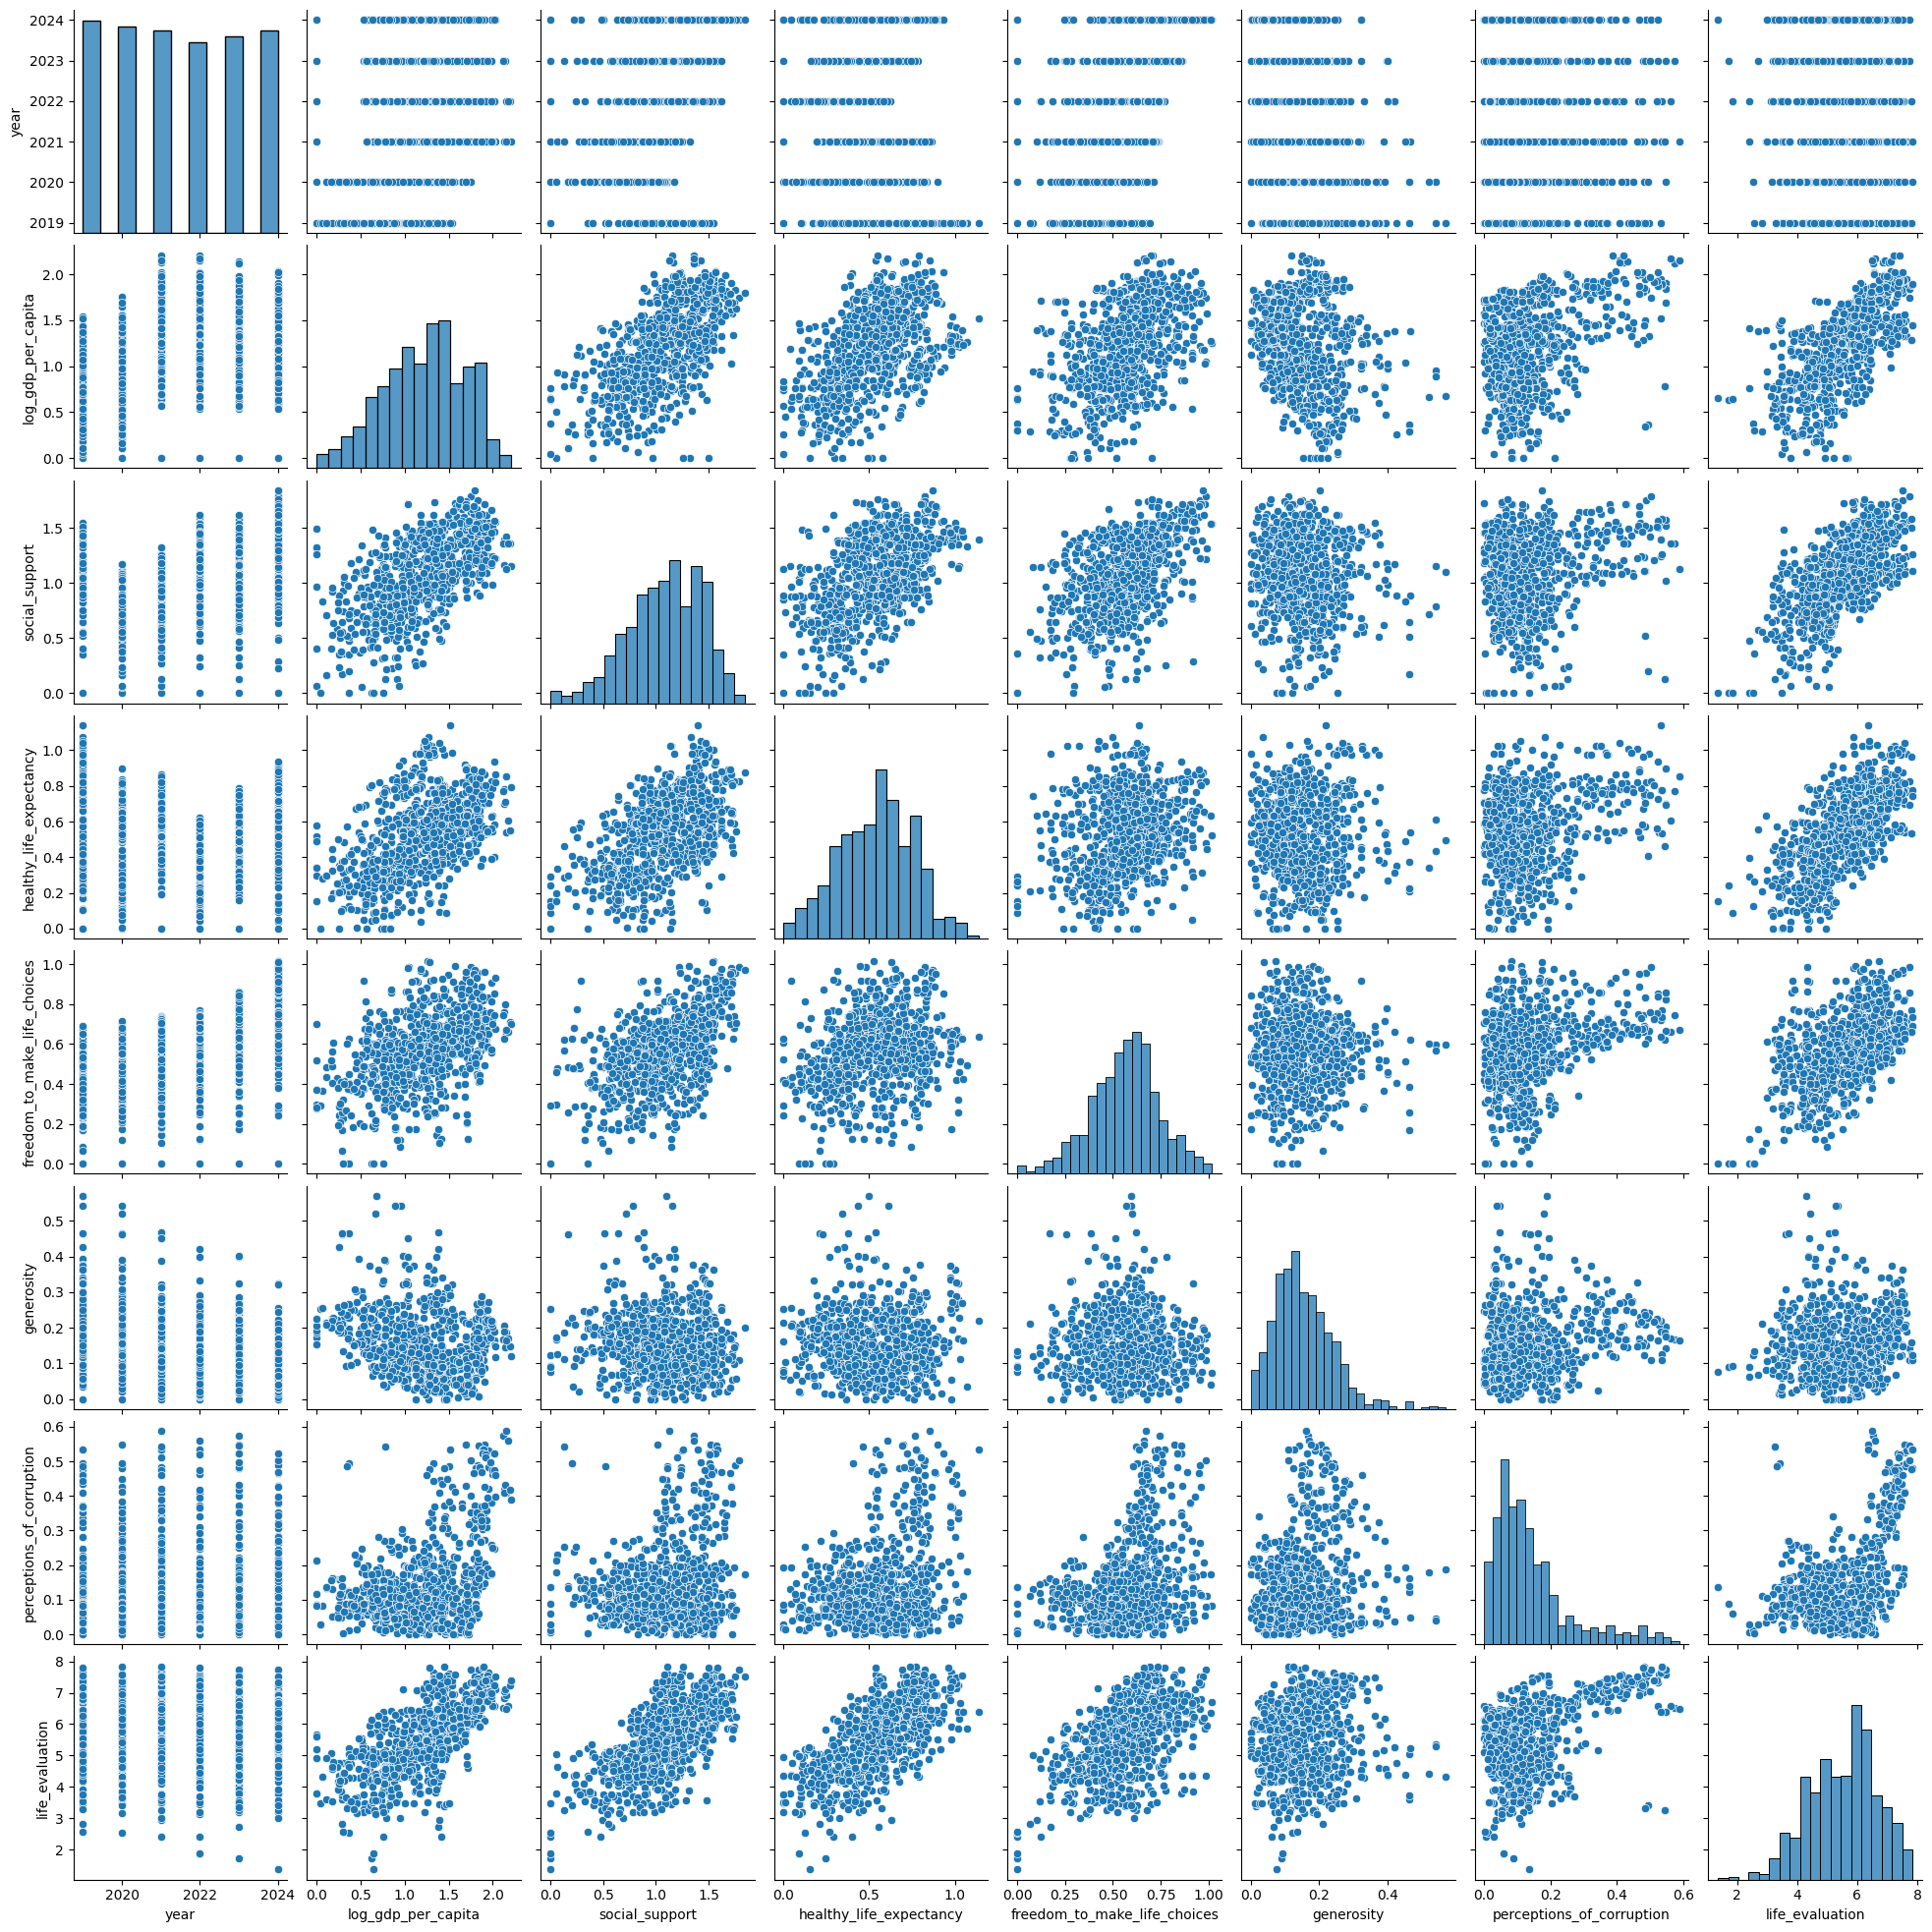

In [9]:
sns.pairplot(df_whr)

In [10]:
df_qog = df[[
    'year',
    'country_name',
    'corruption_index',
    'democracy_index',
    'gini_coefficient',
    'human_dev_index',
    'life_evaluation'
]].dropna().reset_index(drop=True)

df_qog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              705 non-null    int64  
 1   country_name      705 non-null    object 
 2   corruption_index  705 non-null    float64
 3   democracy_index   705 non-null    float64
 4   gini_coefficient  705 non-null    float64
 5   human_dev_index   705 non-null    float64
 6   life_evaluation   705 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 38.7+ KB


In [11]:
df_qog.head()

,year,country_name,corruption_index,democracy_index,gini_coefficient,human_dev_index,life_evaluation
0,2020,Albania,36.0,0.536,29.400000,0.784,5.1170
1,2019,Albania,35.0,0.517,30.100000,0.800,4.8827
2,2018,Albania,36.0,0.527,30.100000,0.797,4.7190
3,2017,Albania,38.0,0.540,33.099998,0.796,4.5860
4,2016,Albania,39.0,0.529,33.700001,0.795,4.6440


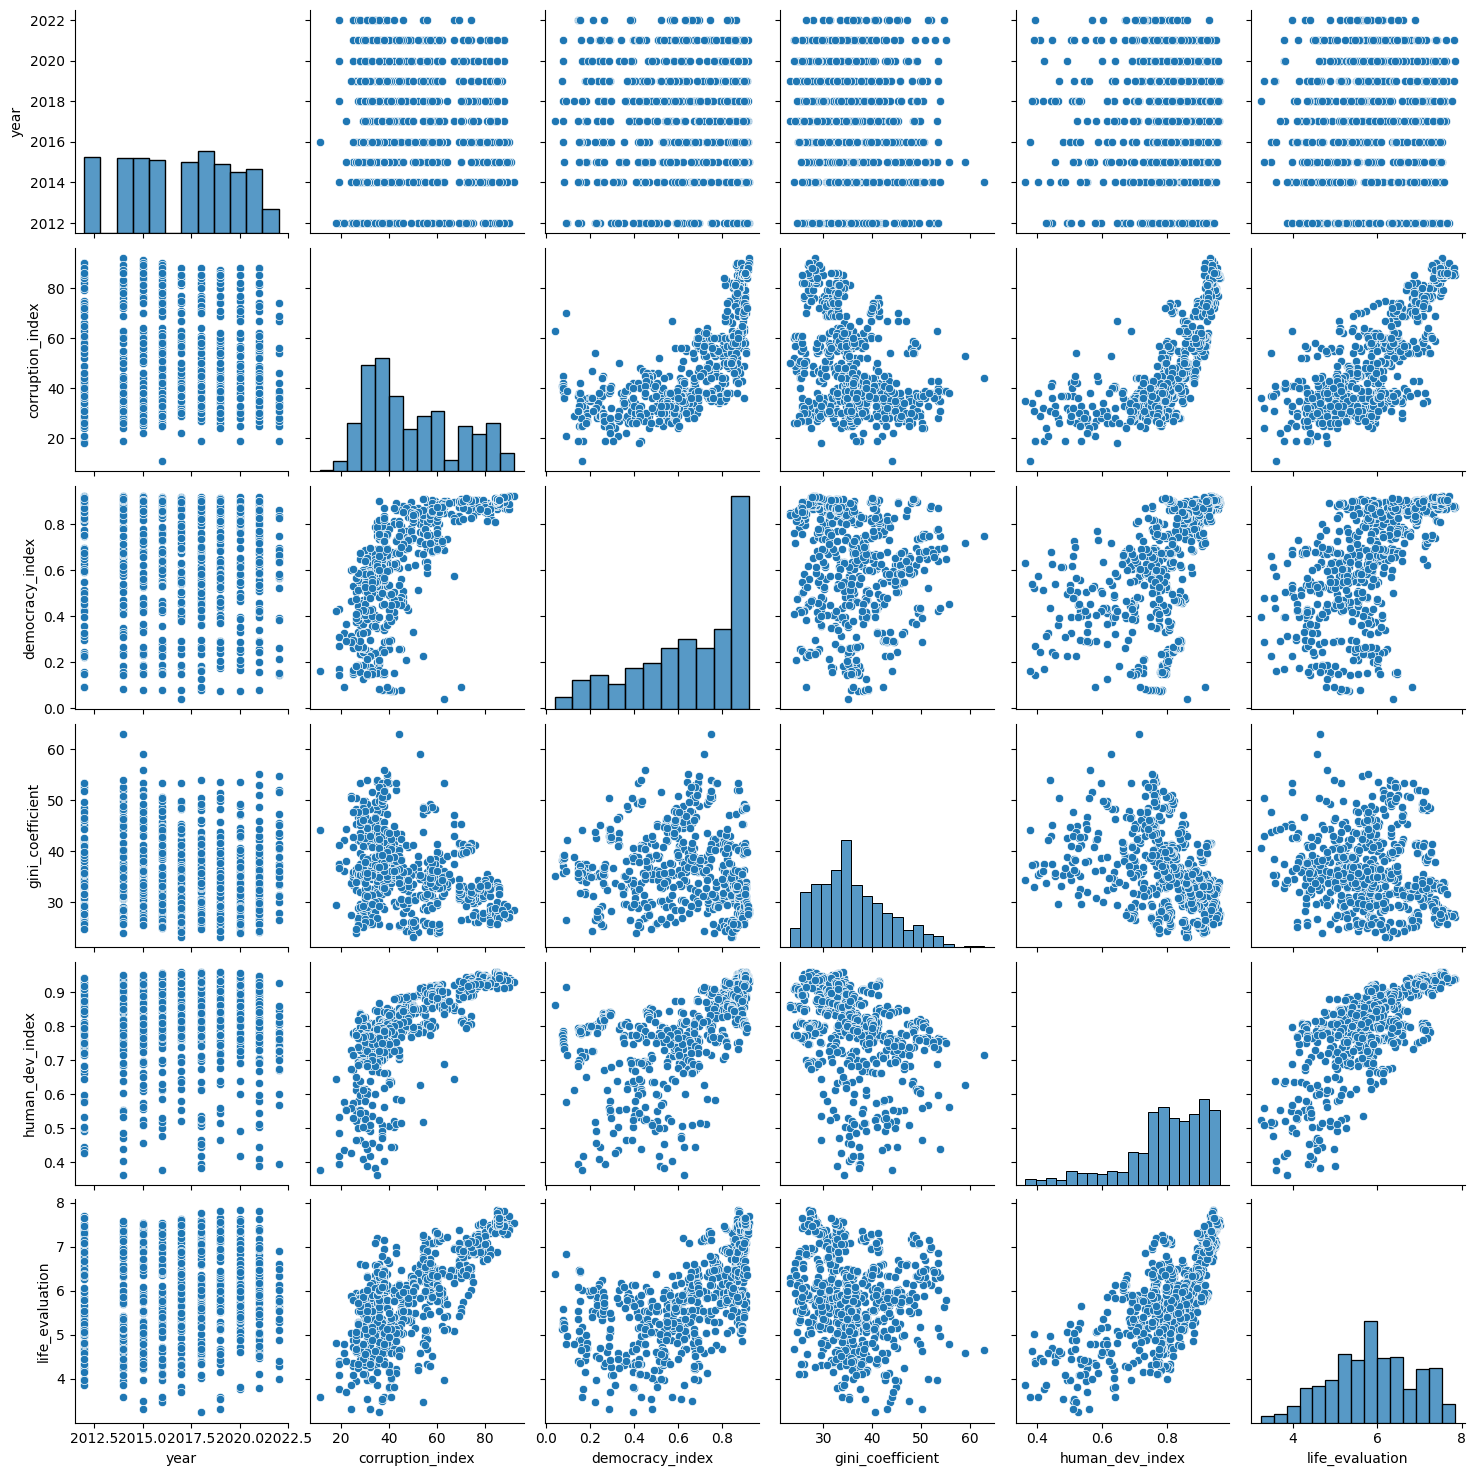

In [12]:
sns.pairplot(df_qog)